In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# MCAR -> Missing Completely at Random
# MAR -> Missing at Random - Random missing value by purpose
# MNAR ->  Missing Not a random - null majority data entry 


In [3]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
print(df.shape)
print(df.isnull().sum())

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [5]:
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
df['age'].describe().T

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

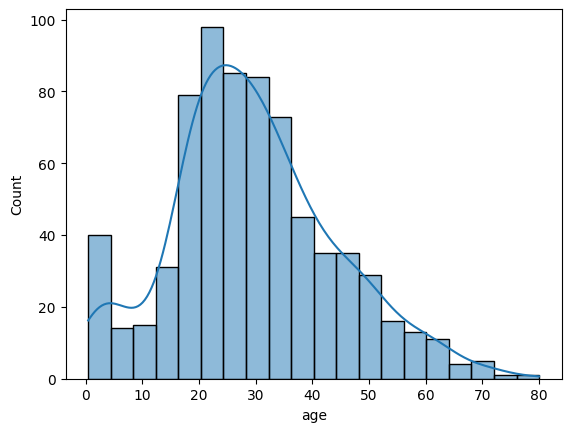

In [12]:
sns.histplot(data=df["age"],kde=True)

In [16]:
df['age_mean']=df['age'].fillna(df["age"].mean())
df[["age","age_mean"]]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


<Axes: ylabel='age'>

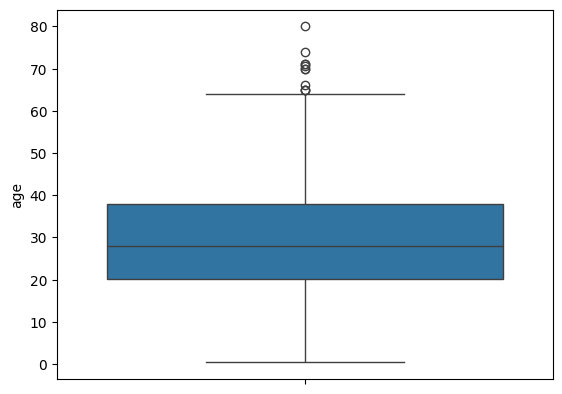

In [17]:
sns.boxplot(data=df,y="age")

In [20]:
df["age_median"]=df["age"].fillna(df["age"].median())
df[["age","age_mean","age_median"]]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [21]:
#random seed

np.random.seed(42)


set1no=900
set2no=100

In [22]:
df1=pd.DataFrame({
    "feature1":np.random.normal(loc=0,scale=1,size=set1no),
    "feature2":np.random.normal(loc=0,scale=1,size=set1no),
    "target":[0]*set1no
})

df2=pd.DataFrame({
    "feature1":np.random.normal(loc=0,scale=1,size=set2no),
    "feature2":np.random.normal(loc=0,scale=1,size=set2no),
    "target":[1]*set2no
})


In [23]:
df1.head()

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0


In [25]:
df=pd.concat([df1,df2],ignore_index=True)
df

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,-0.370011,1.070150,1
996,-0.258796,-0.026521,1
997,1.598647,-0.881875,1
998,0.560919,-0.163067,1


In [27]:
df["target"].unique()

array([0, 1])

In [ ]:
df["target"].value_counts() #Unbalanced Data

target
0    900
1    100
Name: count, dtype: int64

In [29]:
#upsampling -> upsample minoruty
#downsample -> downsample majority

##### Resampling

In [31]:
#Upsampling

df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [33]:
from sklearn.utils import resample

In [34]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)
df_minority_upsample

,feature1,feature2,target
951,1.775311,1.261922,1
992,-0.436386,1.188913,1
914,-0.268531,-1.801058,1
971,-0.214921,-2.940389,1
960,-0.134309,-0.054894,1
...,...,...,...
952,-1.193637,-0.905732,1
965,-1.662492,0.089581,1
976,-0.562168,1.124113,1
942,-0.548725,0.269127,1


In [38]:
df_majority_downsample=resample(df_majority,replace=True,n_samples=len(df_minority),random_state=42)
df_majority_downsample["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [42]:
df_downsampled=pd.concat([df_majority_downsample,df_minority],ignore_index=True)
df_downsampled["target"].value_counts()

df_upsampled=pd.concat([df_minority_upsample,df_majority],ignore_index=True)
df_upsampled["target"].value_counts()

target
1    900
0    900
Name: count, dtype: int64

### SMOTE (Synthetic Minority Over-Sampling Technique) 
##### Balancing the dataset adding similar datas 
##### Best use of imbalanced datasets

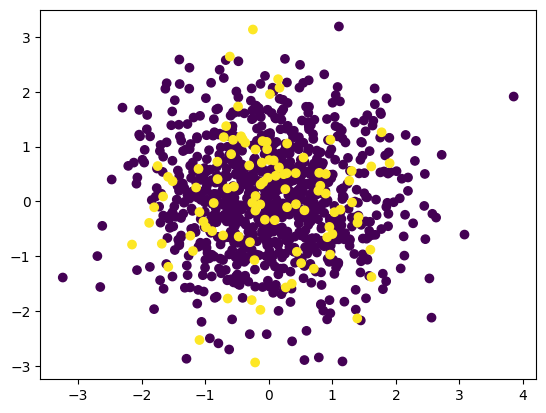

In [43]:
plt.scatter(df["feature1"],df["feature2"],c=df["target"])

In [44]:
!pip install imblearn



   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [45]:
from imblearn.over_sampling import SMOTE

In [50]:
oversample=SMOTE()
(X,y)=oversample.fit_resample(df[["feature1","feature2"]],df["target"])



In [51]:
X

,feature1,feature2
0,0.496714,0.368673
1,-0.138264,-0.393339
2,0.647689,0.028745
3,1.523030,1.278452
4,-0.234153,0.191099
...,...,...
1795,0.949621,-0.632026
1796,-1.220876,-0.618289
1797,1.428958,-2.012013
1798,0.134820,0.546470


In [52]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [56]:
oversample_df=pd.concat([X,y],axis=1)
oversample_df

,feature1,feature2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
1795,0.949621,-0.632026,1
1796,-1.220876,-0.618289,1
1797,1.428958,-2.012013,1
1798,0.134820,0.546470,1


In [58]:
oversample_df["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

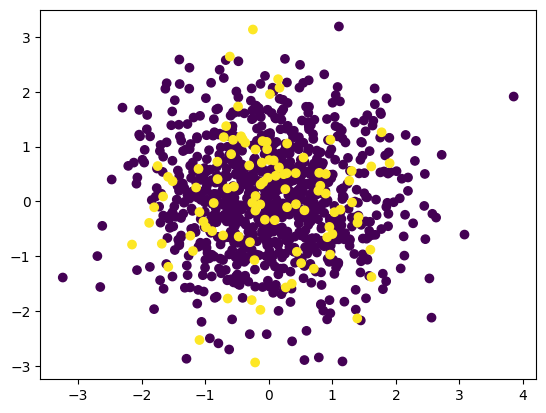

In [60]:
plt.scatter(df["feature1"],df["feature2"],c=df["target"])

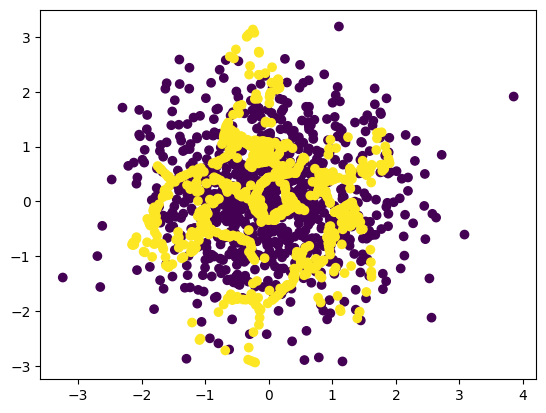

In [ ]:
plt.scatter(oversample_df["feature1"],oversample_df["feature2"],c=oversample_df["target"]) #after SMOTE

# ENCODING
### Return  categorical variables to numeric data
##### One-Hot Encoding
##### Label Encoding (for Ordinal Variables)
##### Ordinal Encoding (for Ordinal Variable - user assignment)
##### Frequency Encoding (number assignment based on mod of the variable)
##### Target Encoding 



In [62]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [70]:
df=sns.load_dataset("titanic")
df.head()
df.shape

(891, 15)

In [67]:
df[["sex","class","embark_town"]].isna().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [69]:
df.dropna(subset="embark_town")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
df=df.dropna(subset="embark_town")
df.shape

(889, 15)

### One-Hot Encoding

In [73]:
df_oneHot=pd.get_dummies(df,columns=["sex","embark_town"],drop_first=True)
df_oneHot
df_oneHot.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [76]:
df_oneHot=pd.get_dummies(df,columns=["sex","embark_town"],drop_first=False)
df_oneHot
df_oneHot.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_female',
       'sex_male', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

#### Label & Ordinal Encoder

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # Good: doesn't overwrite the class name
df_labelencoder = df.copy()
df_labelencoder["sex"] = le.fit_transform(df_labelencoder["sex"])
df_labelencoder




,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Ordinal Encoder

In [90]:

df_ordinal=df.copy()
class_order=["Third","Second","First"]
ordinal_encoder=OrdinalEncoder(categories=[class_order])
df_ordinal["class"]=ordinal_encoder.fit_transform(df_ordinal[["class"]])
df_ordinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'OneHot Categorical'}, xlabel='sex_male'>

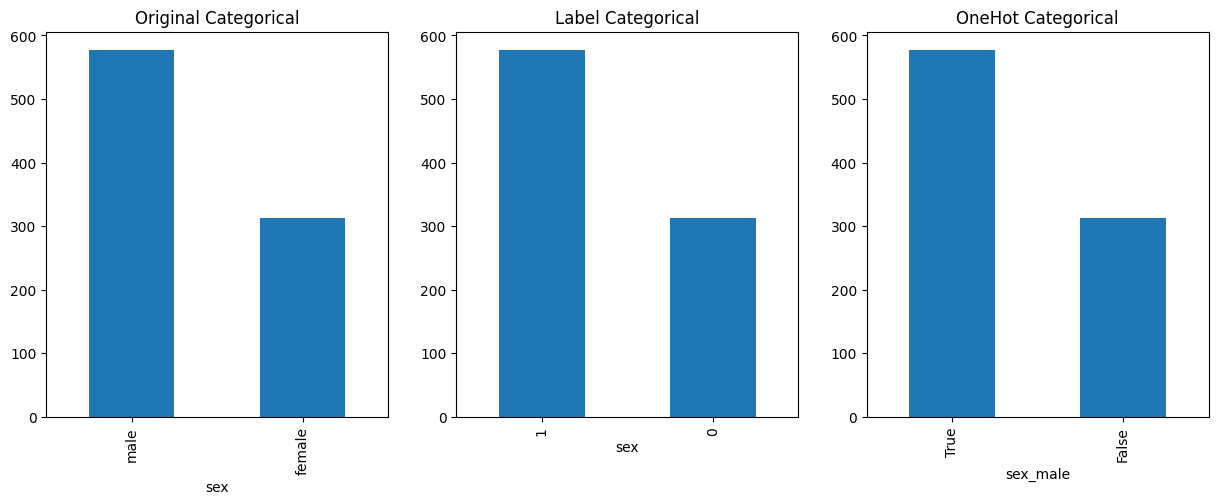

In [99]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df["sex"].value_counts().plot(kind="bar",ax=axes[0],title="Original Categorical")
df_labelencoder["sex"].value_counts().plot(kind="bar",ax=axes[1],title="Label Categorical")
df_oneHot["sex_male"].value_counts().plot(kind="bar",ax=axes[2],title="OneHot Categorical")